# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>No Show Appointments dataset collects information from 100k medical appointments in Brazil. It includes inforamtion of whether patients show up for their appointments or not. It contains characteristics about the patient as follows:
><ul>
><li>‘ScheduledDay’ Tells on which date the appointment was registered.</li>
><li>‘Neighborhood’ indicates where the appointment takes place.</li>
><li>‘Scholarship’ True or False value of whether the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
><li>‘No_show’ True or False if the patient showed up to their appointment,and ‘Yes’ if they did not show up.</li>
></ul>

### Questions for Analysis
><ul>
><li>1. How many appointments where patients showed up vs. not showed up?</li>
><li>2. What is the relation between age and patients attendance?</li>
><li>3. Dose gender has an affect on patient attendance?</li>
><li>4. Dose SMS_received affect the attendance?</li>
><li>5. What are the most disease that has an effect on attendance?</li>
><li>6. What is the relationship between patients who have scholarship and thier attendance?</li>
><li>7. Is there relationship between missing the appointment and the alcoholism?</li>
><li>8. What is the relationship between Neighbourhood and patient attendance?</li>
></ul>

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load the data, check for cleanliness, and then trim and clean the dataset for analysis.



### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data

df=pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv',sep=',')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# show how many rows and column in the dataset
df.shape

(110527, 14)

In [4]:
# dataset statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# check null values
print(df.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [6]:
# check duplicates
print(sum(df.duplicated()))

0


In [7]:
# data types and check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# Convert datatype of ScheduledDay, AppointmentDay
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [9]:
# check data types
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [10]:
# show first rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# Modify timezones
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay).dt.tz_localize(None)
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay).dt.tz_localize(None)

In [12]:
# show first rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
> After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.
 

#### Dropping unnecessary columns

In [14]:
df.drop(['PatientId','AppointmentID'],axis=1 ,inplace=True)
df.drop(['ScheduledDay','AppointmentDay'],axis=1 ,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Lowercase the letters

In [16]:
df['Neighbourhood'] = df['Neighbourhood'].str.title()
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,Jardim Da Penha,0,1,0,0,0,0,No
1,M,56,Jardim Da Penha,0,0,0,0,0,0,No
2,F,62,Mata Da Praia,0,0,0,0,0,0,No
3,F,8,Pontal De Camburi,0,0,0,0,0,0,No
4,F,56,Jardim Da Penha,0,1,1,0,0,0,No


#### Fix outlier values

In [17]:
# Show age column statistics
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [18]:
# check if there is age less than 0
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [19]:
#  we can see there is age less than 0, which is not correct.
# selet rows where age=-1
df.drop(df.query("Age == -1").index,inplace=True)

In [20]:
# chech age values again
df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
56     1635
38     1629
59     1624
2      1618
50     1613
57     1603
36     1580
51     1567
19     1545
39     1536
37     1533
54     1530
34     1526
33     1524
30     1521
6      1521
3      1513
17     1509
32     1505
5      1489
44     1487
18     1487
58     1469
46     1460
45     1453
       ... 
72      615
74      602
76      571
75      544
78      541
77      527
80      511
81      434
82      392
79      390
84      311
83      280
85      275
86      260
87      184
89      173
88      126
90      109
92       86
91       66
93       53
94       33
95       24
96       17
97       11
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [21]:
# Show age column statistics
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

#### Rename Columns

In [22]:
# show columns names
for col in df.columns:
    print(col)

Gender
Age
Neighbourhood
Scholarship
Hipertension
Diabetes
Alcoholism
Handcap
SMS_received
No-show


In [23]:
# change columns names to more appropriate names
df.rename(columns = {'Hipertension': 'Hypertension'}, inplace = True)
df.rename(columns = {'Handcap': 'Handicap'}, inplace = True)
df.rename(columns = {'No-show':'No_show'}, inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,Jardim Da Penha,0,1,0,0,0,0,No
1,M,56,Jardim Da Penha,0,0,0,0,0,0,No
2,F,62,Mata Da Praia,0,0,0,0,0,0,No
3,F,8,Pontal De Camburi,0,0,0,0,0,0,No
4,F,56,Jardim Da Penha,0,1,1,0,0,0,No


#### Create two groups for showed and not showed patients

In [24]:
# change data type int 
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,Jardim Da Penha,0,1,0,0,0,0,0
1,M,56,Jardim Da Penha,0,0,0,0,0,0,0
2,F,62,Mata Da Praia,0,0,0,0,0,0,0
3,F,8,Pontal De Camburi,0,0,0,0,0,0,0
4,F,56,Jardim Da Penha,0,1,1,0,0,0,0


In [26]:
showed = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed
print(df[showed].count(),df[not_showed].count())

Gender           88207
Age              88207
Neighbourhood    88207
Scholarship      88207
Hypertension     88207
Diabetes         88207
Alcoholism       88207
Handicap         88207
SMS_received     88207
No_show          88207
showed           88207
not_showed       88207
dtype: int64 Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handicap         22319
SMS_received     22319
No_show          22319
showed           22319
not_showed       22319
dtype: int64


In [27]:
# check the mean of showed patients
df[showed].mean()

Age             37.790504
Scholarship      0.093904
Hypertension     0.204394
Diabetes         0.073838
Alcoholism       0.030417
Handicap         0.022742
SMS_received     0.291337
No_show          0.000000
showed           1.000000
not_showed       0.000000
dtype: float64

In [28]:
# check the mean of showed patients
df[not_showed].mean()

Age             34.317667
Scholarship      0.115507
Hypertension     0.169004
Diabetes         0.064071
Alcoholism       0.030333
Handicap         0.020297
SMS_received     0.438371
No_show          1.000000
showed           0.000000
not_showed       1.000000
dtype: float64

#### Show general features

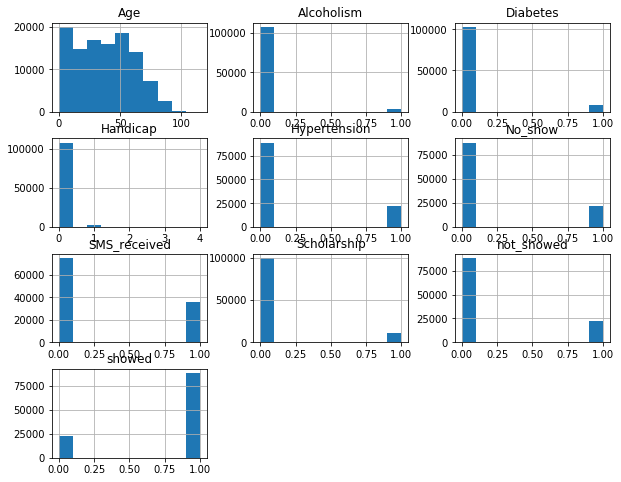

In [29]:
df.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis

> In this section, we explore and address the research questions that posed in the Introduction section.



### Research Question 1 (How many appointments where patients showed up vs. not showed up?)

Showed Patients :88207
 Not showd Patients:22319


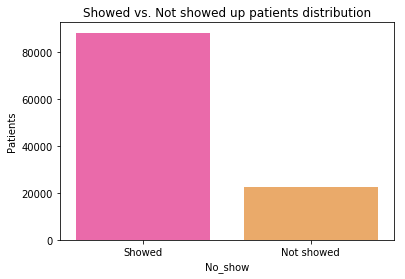

In [30]:
# visualize the distribution of patients who showed and not showed
print ("Showed Patients :{}\n Not showd Patients:{}".format(df['No_show'].value_counts()[0], df['No_show'].value_counts()[1]) )
plot_a = sns.countplot(x=df.No_show, data=df ,palette="spring")
plot_a.set_xticklabels(["Showed", "Not showed"])
plot_a.set_ylabel("Patients")
plot_a.set_title("Showed vs. Not showed up patients distribution")
plt.show()

>We can see that most patients showd up for their appointments.

### Research Question 2  (What is the relation between age and patients attendance?)

Showed Patients Mean: 37.790504155


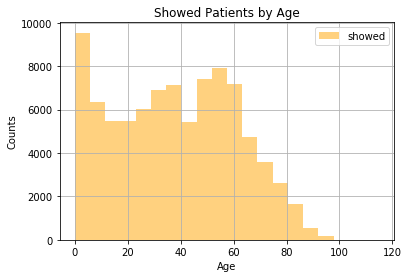

In [31]:
# visualize age and appointment attendance relationship
print("Showed Patients Mean:",df.Age[showed].mean())
df.Age[showed].hist(alpha=0.5, bins=20, label='showed',color="orange")
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Showed Patients by Age")
plt.legend()

> We can see that kids and adults between 45 - 62 are more likely to attend their appointments.

Not Showed Patients Mean: 34.3176665621


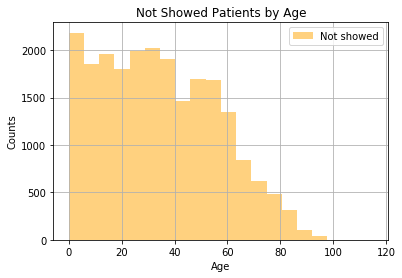

In [34]:
# visualize age and appointment absence relationship
print("Not Showed Patients Mean:",df.Age[not_showed].mean())
df.Age[not_showed].hist(alpha=0.5, bins=20, label='Not showed',color="orange")
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Not Showed Patients by Age")
plt.legend()

>The more patients get older, they less they attend their appointments.

### Research Question 3 (Dose gender has an affect on patient attendance?)

In [36]:
# total patients by gender
print("Number of patients by Gender:")
df['Gender'].value_counts()

Number of patients by Gender:


F    71839
M    38687
Name: Gender, dtype: int64

In [37]:
# Count od showed and not showed patients by Gender
Gender_N = df.groupby("Gender")["No_show"].value_counts()
print(Gender_N )

Gender  No_show
F       0          57245
        1          14594
M       0          30962
        1           7725
Name: No_show, dtype: int64


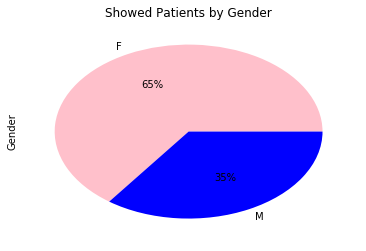

In [38]:
# show patients attendance by Gender 
df.Gender[showed].value_counts().plot(kind='pie', autopct='%1.0f%%',
                                colors = ['pink', 'blue'],
                                title='Showed Patients by Gender')

> overall, most patients are female, and we notice that gender does not have astrong relationship with patient's attendance.

### Research Question 4 (Dose SMS_received affect the attendance?)

Showed up patients:
SMS_received
0    0.832965
1    0.724255
Name: showed, dtype: float64
Not Showed up patients:
SMS_received
0    0.167035
1    0.275745
Name: not_showed, dtype: float64


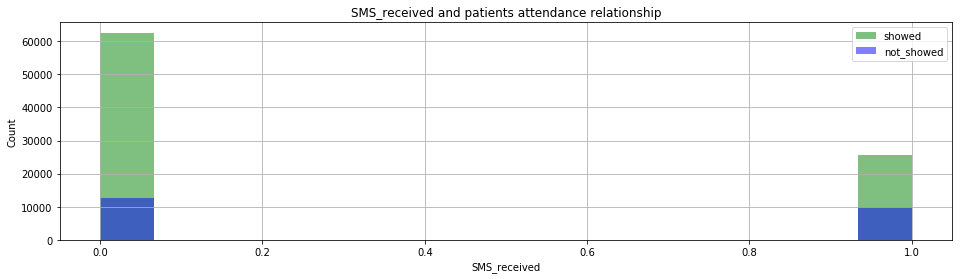

In [39]:
# show the relationship between SMS_received and patient's attendance
print("Showed up patients:")
print(df.groupby('SMS_received')['showed'].mean())
print("Not Showed up patients:")
print(df.groupby('SMS_received')['not_showed'].mean())
def attend(df,col,y,n):
    plt.figure(figsize=[16,4])
    df[col][showed].hist(alpha=.5,bins=15,color='green',label='showed');
    df[col][not_showed].hist(alpha=.5,bins=15,color='blue',label='not_showed');
    plt.legend();
    plt.title('SMS_received and patients attendance relationship')
    plt.xlabel('SMS_received')
    plt.ylabel('Count');
attend(df,'SMS_received',showed,not_showed)

> Most patients attend their appointment without receving SMS.

### Research Question 5 (What are the most disease that has an effect on attendance?)

Diabetes
0    0.796370
1    0.819967
Name: showed, dtype: float64


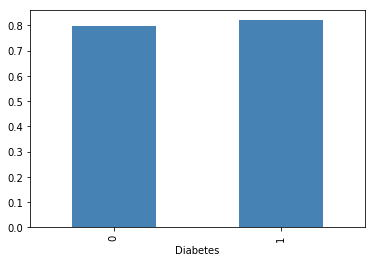

In [40]:
#Show the most disease that has an effect on attendance
df.groupby(['Diabetes']).showed.mean().plot(kind='bar', color='steelblue')
print(df.groupby(['Diabetes']).showed.mean()) 

Hypertension
0    0.790961
1    0.826980
Name: showed, dtype: float64


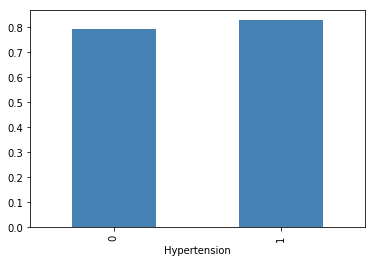

In [41]:
#Show the most disease that has an effect on attendance
df.groupby(['Hypertension']).showed.mean().plot(kind='bar',color='steelblue');
print(df.groupby(['Hypertension']).showed.mean())

Handicap
0    0.797645
1    0.820764
2    0.797814
3    0.769231
4    0.666667
Name: showed, dtype: float64


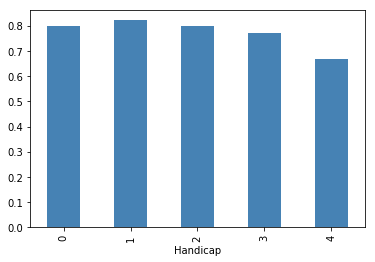

In [42]:
#Show the most disease that has an effect on attendance
df.groupby(['Handicap']).showed.mean().plot(kind='bar',color='steelblue');
print(df.groupby(['Handicap']).showed.mean())

> Based on above plots, diseases does not have an effect on the patient's attendance.

### Research Question 6 (What is the relationship between patients who have scholarship and thier attendance?)

Scholarship
0    0.801926
1    0.762637
Name: showed, dtype: float64
Scholarship
0    0.198074
1    0.237363
Name: not_showed, dtype: float64


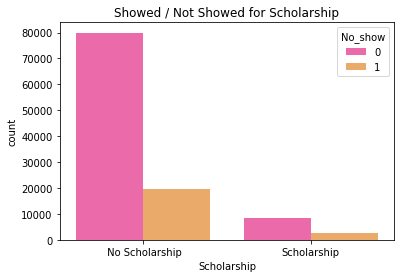

In [43]:
#Plot the relationship between patients who have scholarship and thier attendance
print(df.groupby('Scholarship')['showed'].mean())
print(df.groupby('Scholarship')['not_showed'].mean())
plot_b = sns.countplot(x=df.Scholarship, hue=df.No_show, data=df,palette="spring")
plot_b.set_title("Showed / Not Showed for Scholarship")
x_ticks_labels=[' No Scholarship', 'Scholarship']
plot_b.set_xticklabels(x_ticks_labels)
plt.show()

> It is clear that patients with no scholarship are more likely to attend their appointments more than patients who does have scholarship.

### Research Question 7 (Is there relationship between missing the appointment and the alcoholism?)

Alcoholism for Showed Patients:
0    85524
1     2683
Name: Alcoholism, dtype: int64
 Alcoholism for Not Showed Patients:
0    21642
1      677
Name: Alcoholism, dtype: int64


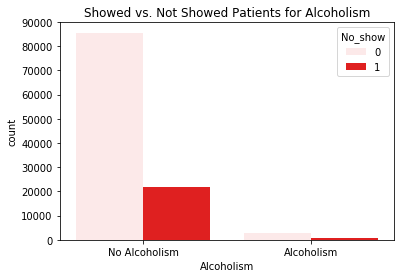

In [44]:
#Plot the relationship between missing the appointment and the alcoholism
print("Alcoholism for Showed Patients:")
print(df.Alcoholism[showed].value_counts())
print(" Alcoholism for Not Showed Patients:")
print(df.Alcoholism[not_showed].value_counts())
plot_c = sns.countplot(x=df.Alcoholism, hue=df.No_show, data=df,color="red")
plot_c.set_title("Showed vs. Not Showed Patients for Alcoholism")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
plot_c.set_xticklabels(x_ticks_labels)
plt.show()

> Since most patients does not have alcoholism, we can not take it as a factore in patients attendance.

### Research Question 8 (What is the relationship between Neighbourhood and patient attendance?)

Jardim Camburi         6252
Maria Ortiz            4586
Resistência            3525
Jardim Da Penha        3246
Santa Martha           2635
Centro                 2631
Itararé                2591
Tabuazeiro             2559
Santo Antônio          2262
Bonfim                 2223
Jesus De Nazareth      2157
Santo André            2063
Jabour                 2058
Caratoíra              1974
São Pedro              1933
Nova Palestina         1862
Da Penha               1788
Andorinhas             1741
Romão                  1740
Ilha Do Príncipe       1734
Gurigica               1562
São José               1549
Forte São João         1543
Ilha De Santa Maria    1524
Bela Vista             1523
Maruípe                1478
São Cristóvão          1473
Redenção               1278
Joana D´Arc            1169
São Benedito           1152
                       ... 
Do Cabral               472
Santos Reis             435
Estrelinha              432
Solon Borges            400
Santa Clara         

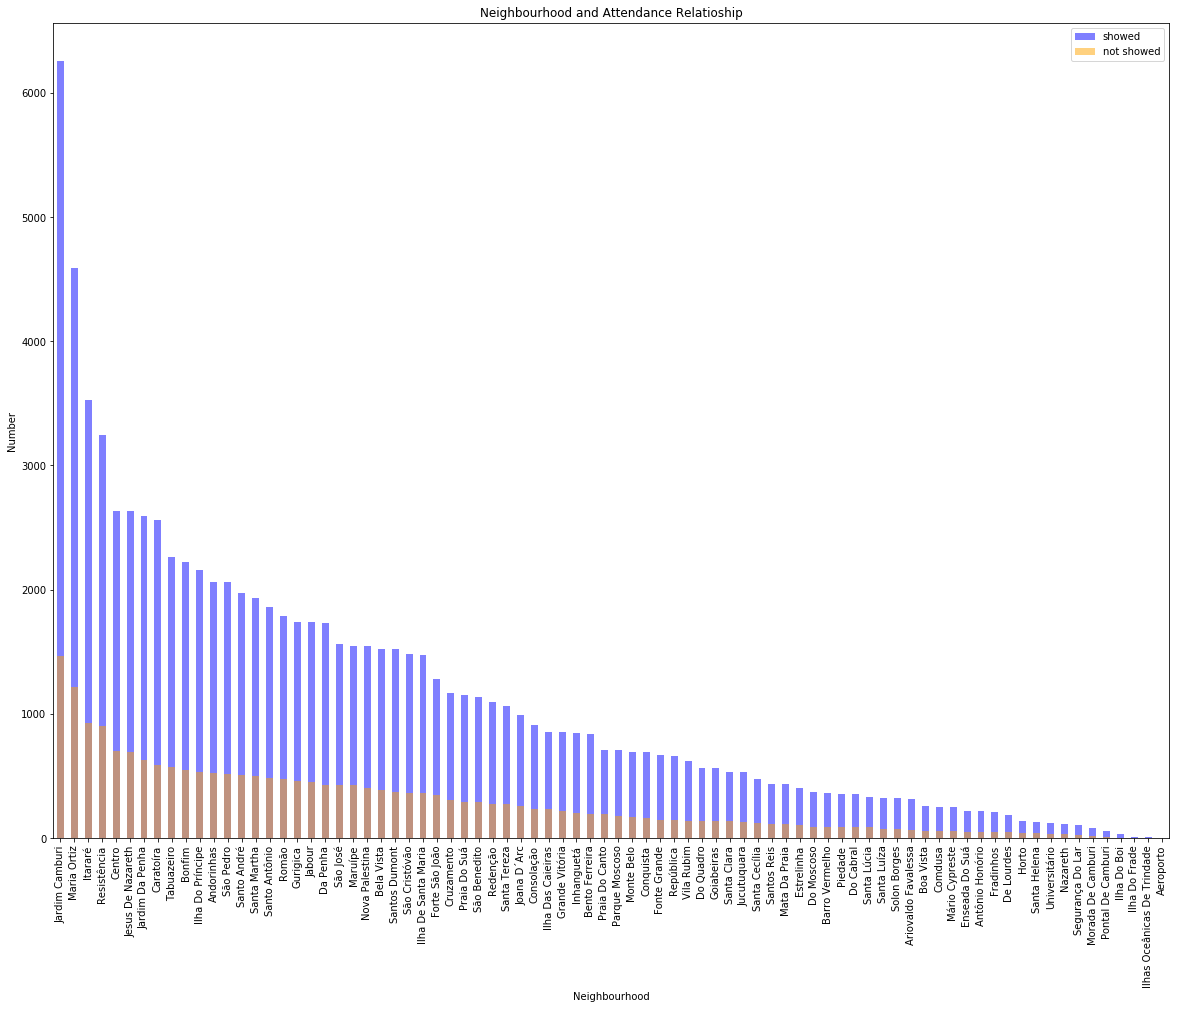

In [45]:
# Show the relationship between Neighbourhood and patient attendance
print(df.Neighbourhood[showed].value_counts())
df.Neighbourhood[showed].value_counts().plot(kind='bar',alpha=0.5,figsize=(20,15) ,color= 'blue', label='showed')
df.Neighbourhood[not_showed].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='not showed')
plt.title("Neighbourhood and Attendance Relatioship")
plt.xlabel("Neighbourhood")
plt.ylabel("Number")
plt.legend();

> Patients count and attendance status differ from one neighbourhood to the other. Jardim Camburi has the highest number of patients and highest attencance status rate.

<a id='conclusions'></a>
## Conclusions

> We investigated the relationship between several features of the dataset and whether it plays role in patients attendance. Following are the findings:

1. Most patients attend their appointments.

2. Age does not have a great effect on patient's attendance. 38 is the average of age for people who are more likly to attend, while 34 is the average age for people who are more likely to not attend their appoinment.

3. There is no relationship between gender and attendance status.

4. Receiving SMS does not increase the patients probability to attend the appoinment.

5. There is a correlation between neighborhood and attendance status. Neighborhoods with highest number of patients have the most appointment attendance rate.

6. Patients with no scholarship more likely to attend their appointment.

7. Having Alcoholism or one of the diseases ('Hypertension','Diabetes','Handicap') does not have an effect on patient's attendance.

In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0